Welcome to the instructory notebook of the Un4CHANate project.

In the first section of this notebook we chunked and cleaned dataset from the InternetArchive 4Plebs (https://archive.org/details/4plebs-org-data-dump-2024-01) containing a week worth of discourse data . Through the chunking process, the files are divided into smaller, more manageable pieces, making them small enough to be opened and processed on a standard computer without requiring high-performance hardware.

If you are interested in testing our specific use case, a demo csv file is added onto this Github repository, applicable to the second notebook.

**STEP I:**

Download your chosen dataset at https://archive.org/details/4plebs-org-data-dump-2024-01

*Categories:*
- /b/: Random (the infamous anything-goes board).
- /v/: Video games.
- /pol/: Politically incorrect.
- /a/: Anime & manga.

**STEP II:** 

Plug in the correct path which redirects to the folder containing the chunked csv files by filling out the cell below (input_file, output_folder (for processed chuncks), if needed change the columns to extract). Please note that by changing the columns the second notebook will not work adequately.

This process will take some time, you can wait for all the chuncks to be processed.
Another option would be to open the processed chunks and assess if the number in the 'time' column is corresponding with your timeframe. To find the the number tied to the timeframe refer to STEP III.

In [ ]:
import pandas as pd

# File paths
input_file = #'C:\Users\(dataset.csv)'
output_folder = #'C:\Users\(outputfolder)'

chunk_size = 10000000 # Number of rows per chunk
columns_to_extract = [4, 22]  # These columns contain the timestamp and the comment string, this can be manually adjusted. 

# Regex pattern to match strings containing ">>"
pattern = r">>"

# Process the file in chunks
chunks = pd.read_csv(
    input_file,
    engine='python',
    chunksize=chunk_size,
    on_bad_lines='skip',
    delimiter=',',
    quoting=3
)

for i, chunk in enumerate(chunks):
    # Extract columns 4 and 23 (indices 3 and 22) and drop missing values
    selected_columns = chunk.iloc[:, columns_to_extract].copy()
    selected_columns.columns = ['time', 'comment']  # Rename the columns for clarity
    selected_columns = selected_columns.dropna()

    # Filter out rows where 'comment' contains ">>"
    cleaned_data = selected_columns[~selected_columns['comment'].str.contains(pattern, na=False)]

    # Define the output file path for this chunk
    output_file = f"{output_folder}/chunk_{i + 1}.csv"

    # Save the cleaned chunk to a CSV file
    cleaned_data.to_csv(output_file, index=False, header=True)
    print(f"Cleaned chunk {i + 1} saved to {output_file}.")

print("All chunks processed and saved successfully.")

**STEP III:** 

Obtaining timestamp code:
1.	Find post you want on the 4plebs archive or find first and last post within the range you want.
2.	Copy post ID e.g. No.494416891
3.	Find the post using one of the 4plebs API endpoints
4.	Adjust the link to include your copied post ID and target board e.g.  https://archive.4plebs.org/_/api/chan/post/?board=pol&num=494416891
5.	 Find timestamp: i.e. 1737003499
6.	Done!

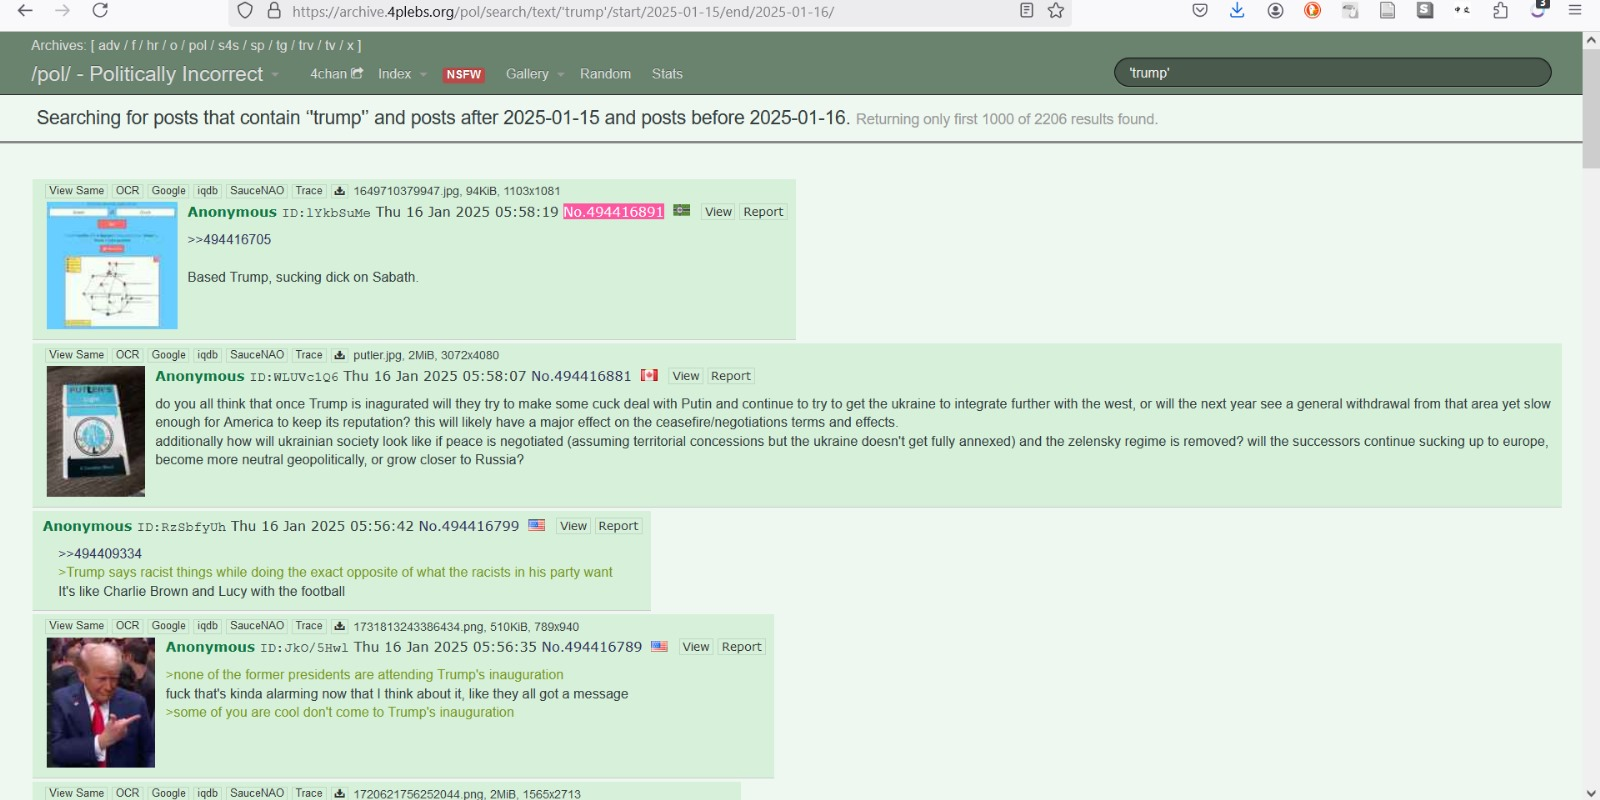
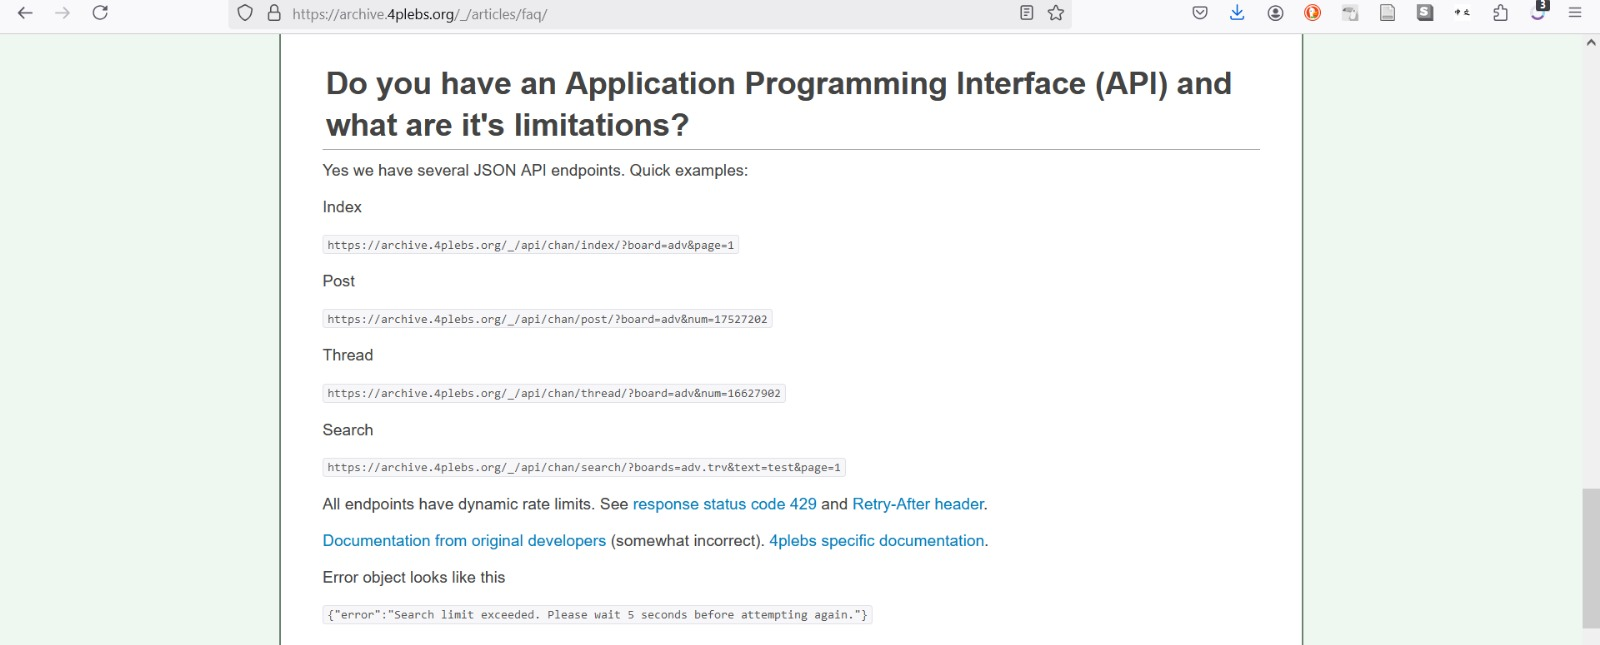
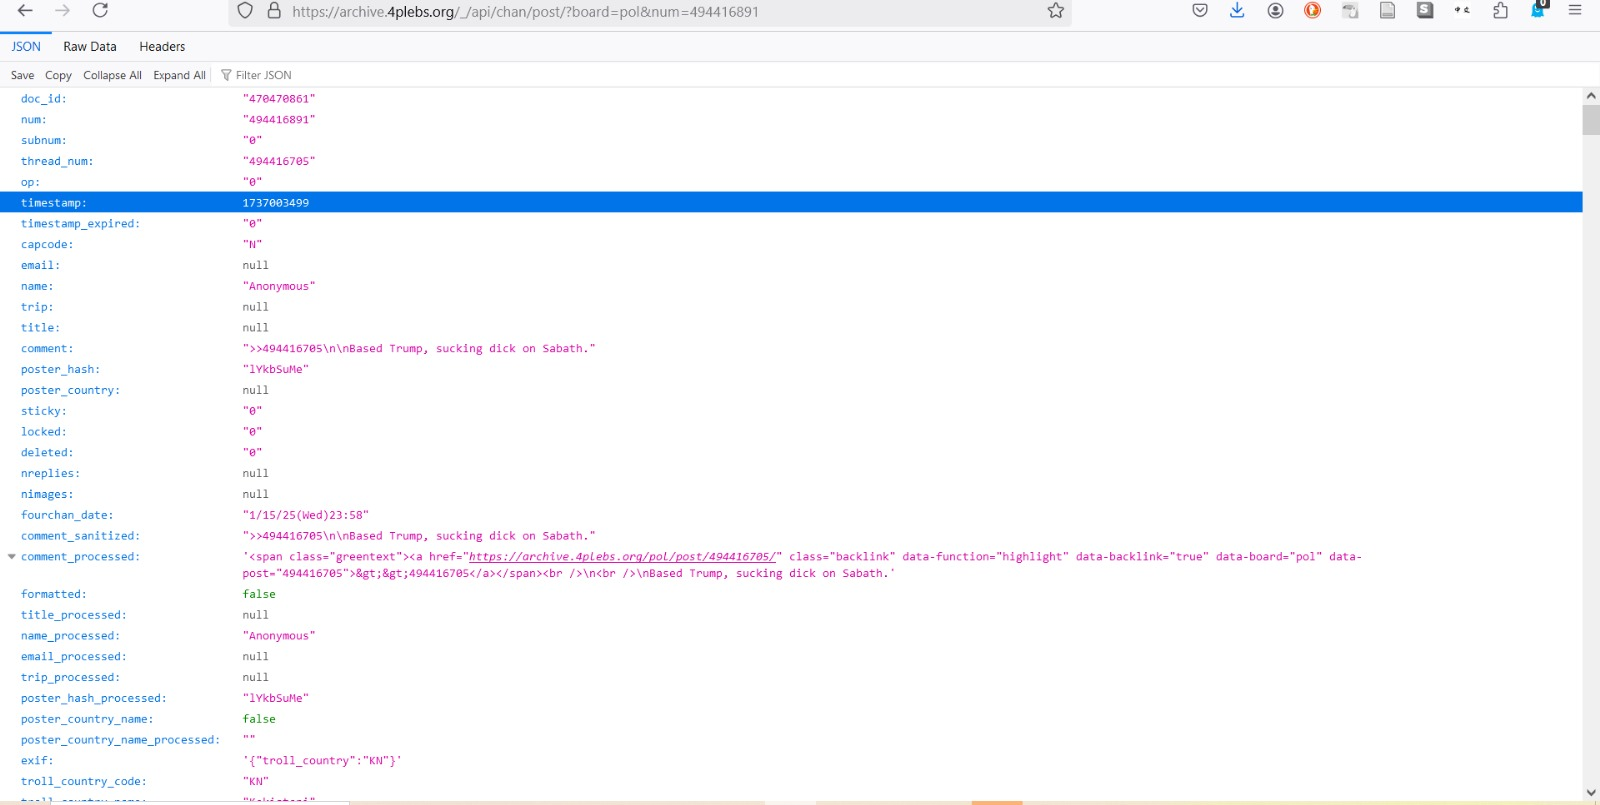

**STEP IV:**

According to the timeframe (int) direct the code to the folder that contains the chuncks that need to be merged. 

In [ ]:
import os
import pandas as pd

def merge_csv_files(destination_folder, output_file):
  
    # List to hold individual DataFrames
    dataframes = []

    # Iterate through all files in the folder
    for file in os.listdir(destination_folder):
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            file_path = os.path.join(destination_folder, file)
            # Read the CSV file into a DataFrame and append it to the list
            try:
                df = pd.read_csv(file_path)
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file}: {e}")

    # Concatenate all DataFrames into one
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        # Export the combined DataFrame to a CSV file
        combined_df.to_csv(output_file, index=False)
        print(f"Merged CSV saved to {output_file}")
        return combined_df
    else:
        print("No CSV files found in the destination folder.")
        return pd.DataFrame()

# Example usage:
if __name__ == "__main__":
    folder_path = r""  # Replace with your destination folder path
    output_csv = r"\merged_output.csv"  # Replace with your desired output file path
    result_df = merge_csv_files(folder_path, output_csv)
    print(result_df)


**STEP V:**

Now use the 'merged_output.csv' and add the numerical range of your timeframe in the cell below.

In [ ]:
df = pd.read_csv(r'\merged_output.csv') # Fill in your path to the merged_file

# Strip whitespace or quotes from the first column values and convert to integers
df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.strip(' "')
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce', downcast='integer')

# Drop rows where conversion resulted in NaN
df = df.dropna(subset=[df.columns[0]])

# Convert the column to integers after cleaning
df.iloc[:, 0] = df.iloc[:, 0].astype(int)

# Filter rows based on the specified range
filtered_df = df[(df.iloc[:, 0] >= #begin range int ) & (df.iloc[:, 0] <= #end range int)] #fill in the timestamps for as integers for the range


# Display the filtered DataFrame to the user
filtered_df.head()
filtered_df.info()

#Export the filtered Dataframe to a .csv

filtered_df.to_csv(r'final_dataset.csv') #Fill in the name and location for the final dataframe

**DATA_LOADER_4CHAN** completed! Now proceed to the second notebook to analyze the 'final_dataset.csv'!